<a href="https://colab.research.google.com/github/WelfLowe/Public-ML-Notebooks/blob/master/Variants_of_Simple_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold

Here's the Python code to generate and plot two 2D distributions:  

- The first distribution has a correlation of **0.5**.  
- The second distribution has **no correlation**.  
- The two distributions are plotted in **blue** and **red**.  


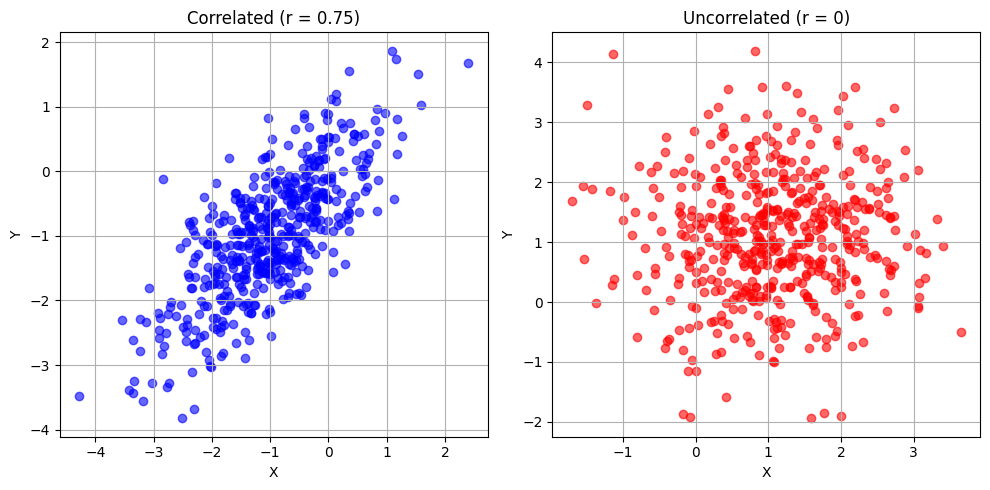

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
N = 500
r = 0.75
# Generate correlated data (correlation = 0.5)
mean = [-1, -1]
cov_correlated = [[1, r], [r, 1]]  # Covariance matrix with correlation r
data_correlated = np.random.multivariate_normal(mean, cov_correlated, N)

# Generate uncorrelated data (correlation = 0)
mean = [1, 1]
cov_uncorrelated = [[1, 0], [0, 1]]  # Covariance matrix with no correlation
data_uncorrelated = np.random.multivariate_normal(mean, cov_uncorrelated, N)

# Plot the data
plt.figure(figsize=(10, 5))

# Plot correlated data
plt.subplot(1, 2, 1)
plt.scatter(data_correlated[:, 0], data_correlated[:, 1], color='blue', alpha=0.6)
plt.title(f"Correlated (r = {r})")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

# Plot uncorrelated data
plt.subplot(1, 2, 2)
plt.scatter(data_uncorrelated[:, 0], data_uncorrelated[:, 1], color='red', alpha=0.6)
plt.title("Uncorrelated (r = 0)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

plt.tight_layout()
plt.show()

This will generate two side-by-side scatter plots:
- **Left (blue)**: The correlated dataset (correlation = 0.75).  
- **Right (red)**: The uncorrelated dataset (correlation = 0).  


         X1        X2  Label
0  2.078681  0.961492    0.0
1  0.215102  1.648280    0.0
2  1.722381  0.627167    0.0
3  1.056650  1.529693    0.0
4 -3.022139 -3.278705    1.0


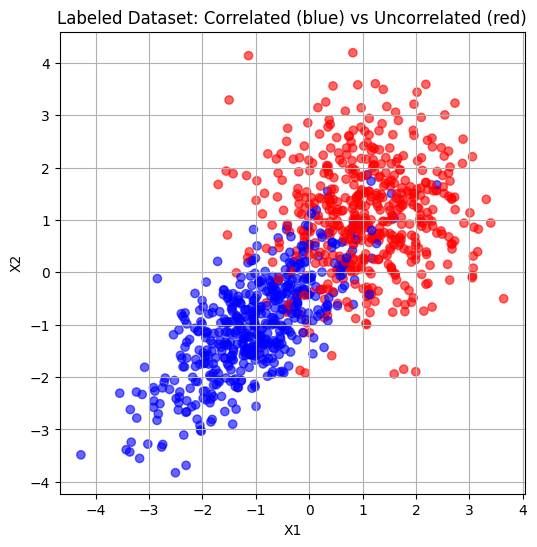

In [3]:
labels_correlated = np.ones((N, 1))  # Label 1 for correlated data
labels_uncorrelated = np.zeros((N, 1))  # Label 0 for uncorrelated data

# Merge the datasets
X = np.vstack((data_correlated, data_uncorrelated))  # Features
y = np.vstack((labels_correlated, labels_uncorrelated))  # Labels

# Convert to a Pandas DataFrame
df = pd.DataFrame(np.hstack((X, y)), columns=['X1', 'X2', 'Label'])

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows
print(df.head())

# Plot the labeled dataset
plt.figure(figsize=(6, 6))
colors = ['blue' if label == 1 else 'red' for label in df['Label']]
plt.scatter(df['X1'], df['X2'], c=colors, alpha=0.6)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Labeled Dataset: Correlated (blue) vs Uncorrelated (red)")
plt.grid(True)
plt.show()

Now we can use 5-fold cross-validation to compare the accuracy of Naïve Bayes, Logistic Regression, Linear Discriminant Analysis (LDA), and Quadratic Discriminant Analysis (QDA) on the generated dataset:

Steps:

1. Generate the dataset (correlated and uncorrelated samples with labels).
2. Split the data into training and validation folds using 5-fold cross-validation.
3. Train and evaluate each classifier using cross-validation.
4. Compare their mean accuracy scores.


In [4]:
# Define classifiers
models = {
    "Naïve Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")

# Compare accuracy scores
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Mean Accuracy')
plt.title('Classifier Performance Comparison')
plt.show()


NameError: name 'labels' is not defined